Hi everyone, 

This is the solution for the implementation for a calcium wave in a 1D string of units. 

Please, feel free to ask me questions if something is unclear.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.integrate

from array import array
from pylab import *
from scipy.integrate.odepack import odeint

from scipy.integrate import odeint
from math import exp, log, sqrt, pi


def CICR(y, t):
    #constants
    k_1 = 2*10**(-5);
    k_2 = 0.13;
    k_4 = 0.9;
    kappa_1 = 0.013;
    kappa_2 = 0.58;
    K_d = 0.5;
    n = 3;
    gamma = 4.17;
    c0 = 1000;

    #input
    c = y[0::2];
    cSR = y[1::2];

    #calculation of k_3
    k_3 = kappa_1 + (kappa_2*c**n)/(K_d**n+c**n);

    #calcium entry
    J_L1 = k_1 * (c0 - c)

    #calcium extrusion
    J_P1 = k_2 * c;

    #calcium release
    J_L2  = k_3 *(cSR - c);

    #calcium uptake
    J_P2 = k_4 *c;
    
    
    # intra-unit fluxes
    tau_cyt = ones(c.shape)*25
    tau_SR = ones(cSR.shape)*25

    if (units != 1):
        #Boundary Conditions
        Cai_BC = pad(c, (1, 1), mode='constant')
        Ca_sr_BC = pad(cSR, (1, 1), mode='constant')
        
        #fluxes between same compartments in different units
        J_diff_cyt = (Cai_BC[0:units] + Cai_BC[2:units+2] - 2*c)/tau_cyt
        J_diff_SR = (Ca_sr_BC[0:units] + Ca_sr_BC[2:units+2] - 2*cSR)/tau_SR
    else:
        J_diff_cyt = 0
        J_diff_SR = 0
        
        

    #caculate time dependent functions
    dc = (J_L1-J_P1+J_L2-J_P2) + J_diff_cyt#dc  
    dcSR = gamma*(-J_L2+J_P2) + J_diff_SR  #dcSR
    
    ydotMultiUnit = zeros(y.shape)
    ydotMultiUnit[0::2] = dc
    ydotMultiUnit[1::2] = dcSR
    

    return ydotMultiUnit


#initial conditions
units = 10

y0 = [0.0795,4.1725]
y0MultiUnit = np.tile(y0,units)

time = np.linspace(0.0,1000.0, num = 1000)

#ode function call
y = scipy.integrate.odeint(CICR, y0MultiUnit, time);


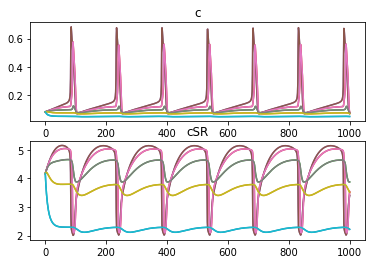

In [6]:
plt.subplot(2,1,1); plt.plot(time,y[:,0::2]); plt.title('c')
plt.subplot(2,1,2); plt.plot(time,y[:,1::2]); plt.title('cSR')
plt.show()